In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.matlab import loadmat
import seaborn as sns
from scipy.stats import poisson
import numpy as np
import os

In [2]:
! pip install xlrd

In [3]:
path_0228 = '/Users/andrey/Documents/data-SGR/20200228/Number_of_cells_in_droplets_0228.xlsx'
csv_0228 = '/Users/andrey/Documents/data-SGR/20200228/Number_of_cells_in_droplets_0228+morpho.csv'
path_0303 = '/Users/andrey/Documents/data-SGR/20200303_4ngml_2x10-3/Number_of_cells_in_droplets_0303.xlsx'

In [4]:
def convert_no_cells(value):
    try:
        return int(value)
    except ValueError:
        return -1
    
def read_xlsx(path:str, **kwargs) -> pd.DataFrame:
    positive = ['negative', 'positive', 'empty']
    if (ext := os.path.basename(path).split('.')[-1]) == 'xlsx': 
        data = pd.read_excel(path)
    elif ext == 'csv':
        data = pd.read_csv(path)
    else:
        raise ValueError(f'Expected csv or xlsx, got {ext}')
        
    data['n_cells'] = list(map(convert_no_cells, data['No cells']))
    data['exp_phase'] = list(map(convert_no_cells, data['Final state']))
    data['outcome'] = [positive[p] for p in data.exp_phase]
    for k,v in kwargs.items():
        data[k] = v
    return data

In [40]:
feb_data = read_xlsx(csv_0228, dataset='feb')
mar_data = read_xlsx(path_0303, dataset='mar')
data = pd.concat([feb_data, mar_data])
data.head()

ID index No cells Final state Status  Unnamed: 4 Morphology  n_cells  \
0         1        2           1      1         NaN        NaN        2   
1         2        5           1      1         NaN        NaN        5   
2         3        2           1      1         NaN        NaN        2   
3         4        1           0      1         NaN        NaN        1   
4         5        1           0      1         NaN        NaN        1   

   exp_phase   outcome dataset  
0          1  positive     feb  
1          1  positive     feb  
2          1  positive     feb  
3          0  negative     feb  
4          0  negative     feb

In [6]:
feb_data.Morphology.unique()

array([nan, 'A', 'B'], dtype=object)

In [7]:
rates_feb = pd.read_csv('rates_feb_max_proj.csv')

In [8]:
rates_feb = pd.read_csv('rates_feb.csv')

In [9]:
assert (rates_feb['ID index'] == feb_data['ID index']).all()

In [10]:
feb_data['lag'] = rates_feb['lag']

In [11]:
feb_data['lambda'] = rates_feb['lambda']

In [12]:
feb_data['delay'] = rates_feb['delay']

In [13]:
feb_data

ID index No cells  Final state  Status  Unnamed: 4 Morphology  n_cells  \
0           1        2            1       1         NaN        NaN        2   
1           2        5            1       1         NaN        NaN        5   
2           3        2            1       1         NaN        NaN        2   
3           4        1            0       1         NaN        NaN        1   
4           5        1            0       1         NaN        NaN        1   
..        ...      ...          ...     ...         ...        ...      ...   
222       223        2            1       1         NaN        NaN        2   
223       224        2            1       1         NaN        NaN        2   
224       225        0            0       1         NaN        NaN        0   
225       226        1            0       1         NaN        NaN        1   
226       227        2            1       1         NaN        NaN        2   

     exp_phase   outcome dataset        lag    lambda      delay  
0            1  positive     feb   5.882562  1.921007  11.626039  
1            1  positive     feb   7.919026  1.935879  11.140554  
2            1  positive     feb  20.163330  1.714265   8.263064  
3            0  negative     feb        NaN       NaN        NaN  
4            0  negative     feb        NaN       NaN        NaN  
..         ...       ...     ...        ...       ...        ...  
222          1  positive     feb   0.549468  1.702391  14.338982  
223          1  positive     feb  18.243133  1.937982   9.535368  
224          0  negative     feb        NaN       NaN        NaN  
225          0  negative     feb        NaN       NaN        NaN  
226          1  positive     feb   0.759453  1.337270  10.830824  

[227 rows x 13 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11820efd0>]],
      dtype=object)

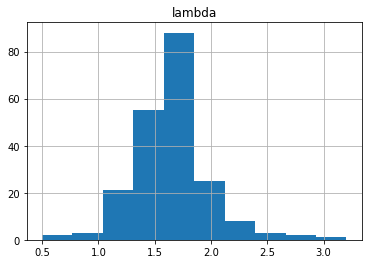

In [14]:
feb_data.hist('lambda')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1183425b0>]],
      dtype=object)

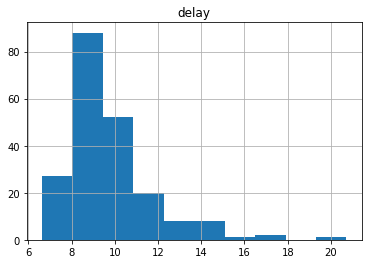

In [15]:
feb_data.hist('delay')

In [16]:
feb_data['lambda'].mean()

1.6473270935356932

Text(0.5, 1, 'Doubling time, frames')

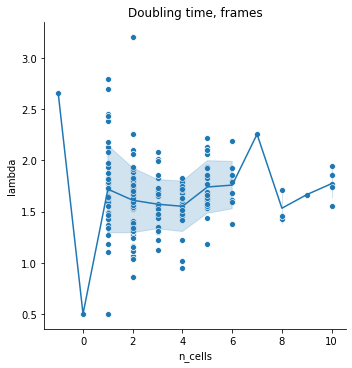

In [17]:
sns.relplot(x='n_cells', y='lambda', data=feb_data)
sns.lineplot(x='n_cells', y='lambda', data=feb_data, ci='sd')
plt.title('Doubling time, frames')

<ipython-input-37-c5c3b0628ec8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_data = feb_data[feb_data.outcome == 'positive'][feb_data.n_cells > 0]


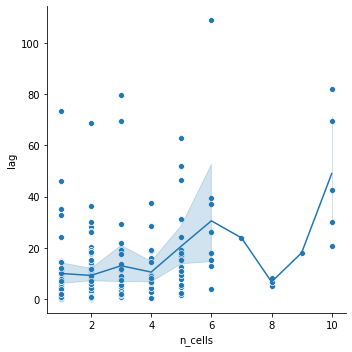

In [37]:
positive_data = feb_data[feb_data.outcome == 'positive'][feb_data.n_cells > 0]
# data = feb_data
sns.relplot(x='n_cells', y='lag', data=positive_data)
sns.lineplot(x='n_cells', y='lag', data=positive_data)

In [19]:
sns.relplot(x='lambda', y='lag', data=feb_data)
# sns.lineplot(x='lambda', y='lag', data=feb_data)

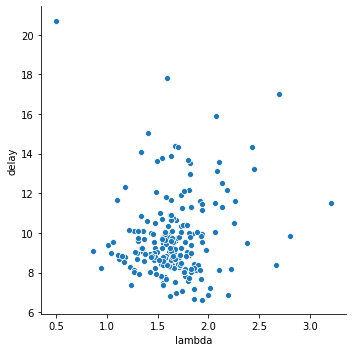

In [20]:
sns.relplot(x='lambda', y='delay', data=feb_data)
# sns.lineplot(x='lambda', y='lag', data=feb_data)

In [21]:
# sns.violinplot(x='n_cells', y='delay', data=data)
sns.lineplot(x='n_cells', y='delay', data=feb_data, ci='sd')
plt.title('Time to reach 10% of max intensity, frames')

Text(0.5, 1.0, 'Time to reach 10% of max intensity, frames')

Text(0.5, 1.0, 'Time to reach 10% of max intensity, frames')

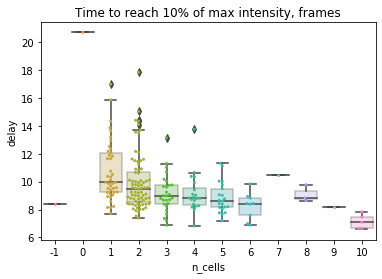

In [22]:
sns.swarmplot(x='n_cells', y='delay', data=feb_data, size=3)
sns.boxplot(x='n_cells', y='delay', data=feb_data, boxprops=dict(alpha=.3))

plt.title('Time to reach 10% of max intensity, frames')

Text(0.5, 1.0, 'Doubling time, frames')

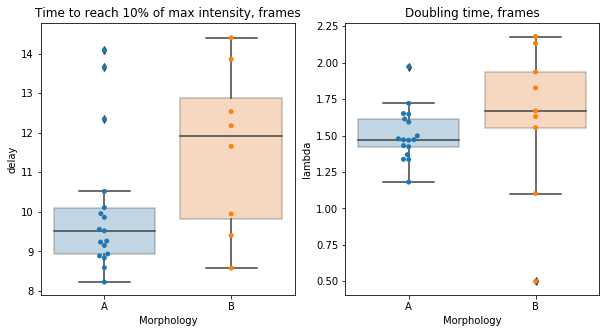

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.swarmplot(ax= ax[0], x='Morphology', y='delay', data=feb_data)
sns.boxplot(ax= ax[0], x='Morphology', y='delay', data=feb_data, boxprops=dict(alpha=.3))

ax[0].set_title('Time to reach 10% of max intensity, frames')

sns.swarmplot(ax= ax[1], x='Morphology', y='lambda', data=feb_data)
sns.boxplot(ax= ax[1], x='Morphology', y='lambda', data=feb_data, boxprops=dict(alpha=.3))
ax[1].set_title('Doubling time, frames')


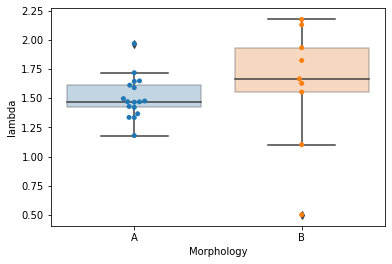

In [24]:
sns.swarmplot(x='Morphology', y='lambda', data=feb_data)
sns.boxplot(x='Morphology', y='lambda', data=feb_data, boxprops=dict(alpha=.3))

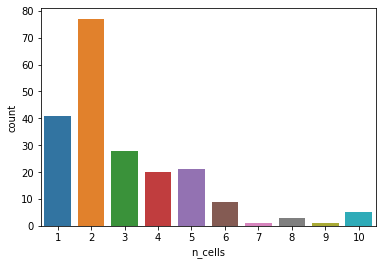

In [38]:
sns.countplot(x='n_cells', data=positive_data)

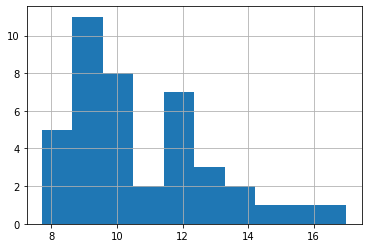

In [386]:
data[data.n_cells == 1].delay.hist()

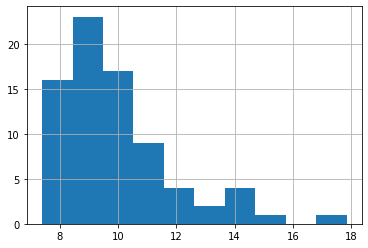

In [387]:
data[data.n_cells == 2].delay.hist()

In [360]:
n_cells, bins = np.histogram(feb_data.n_cells[feb_data.n_cells > 0])

<BarContainer object of 10 artists>

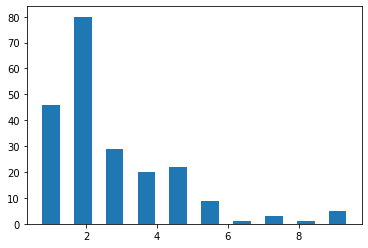

In [361]:
plt.bar(bins[:-1], n_cells, width=.5)

In [274]:
feb_data[feb_data.n_cells == 0]

ID index No cells  Final state  Status  n_cells  exp_phase   outcome  \
152       153        0            0       0        0          0  negative   
171       172        0            0       1        0          0  negative   
175       176        0            0       0        0          0  negative   
189       190        0            0       1        0          0  negative   
196       197        0            0       1        0          0  negative   
202       203        0            0       1        0          0  negative   
208       209        0            0       1        0          0  negative   
220       221        0            0       1        0          0  negative   
221       222        0            0       1        0          0  negative   
224       225        0            0       1        0          0  negative   

    dataset           lag  lambda      delay  
152     feb           NaN     NaN        NaN  
171     feb           NaN     NaN        NaN  
175     feb           NaN     NaN        NaN  
189     feb           NaN     NaN        NaN  
196     feb           NaN     NaN        NaN  
202     feb           NaN     NaN        NaN  
208     feb           NaN     NaN        NaN  
220     feb           NaN     NaN        NaN  
221     feb  2.541696e-15     0.5  18.557651  
224     feb           NaN     NaN        NaN

In [243]:
data.dtypes

ID index        int64
No cells       object
Final state    object
Status         object
n_cells         int64
exp_phase       int64
outcome        object
dataset        object
dtype: object

In [47]:
sns.countplot(x='n_cells', data=data, hue='dataset')
plt.ylabel('number of wells')
plt.title


<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

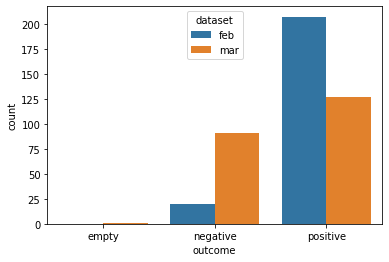

In [144]:
sns.countplot(x='outcome', hue='dataset', data=data, order=['empty', 'negative', 'positive'])

Text(0.5, 1.0, 'Expectancy to grow into colony')

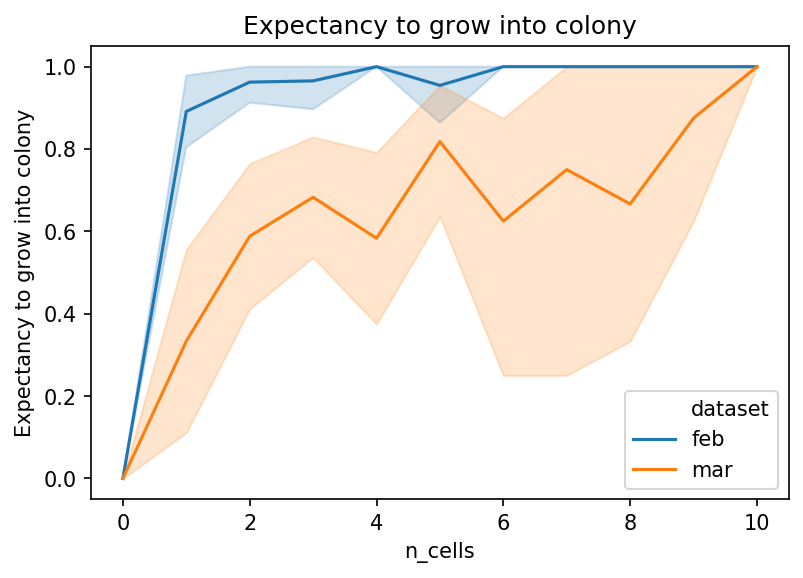

In [61]:
fig, ax = plt.subplots(dpi=150)
sns.lineplot(
    ax=ax,
    x='n_cells', 
    y='exp_phase', 
    hue='dataset', 
    data=data[np.logical_and(data.n_cells >= 0, data.n_cells <11)]
)

plt.ylabel('Expectancy to grow into colony')
plt.title('Expectancy to grow into colony')

<ipython-input-34-25ec3273492a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=mar_data[mar_data.n_cells >= 0][mar_data.n_cells <11])


Text(0.5, 1.0, 'Expectancy to grow into colony')

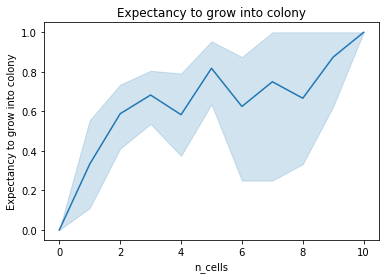

In [34]:
sns.lineplot(
    x='n_cells', 
    y='exp_phase', 
#     hue='dataset', 
    data=mar_data[mar_data.n_cells >= 0][mar_data.n_cells <11])

plt.ylabel('Expectancy to grow into colony')
plt.title('Expectancy to grow into colony')

In [32]:
sns.lineplot(
    x='n_cells', 
    y='exp_phase', 
#     hue='dataset', 
    data=feb_data[feb_data.n_cells >= 0])
plt.ylabel('Expectancy to grow into colony')
plt.title('Expectancy to grow into colony')


Text(0.5, 1.0, 'Expectancy to grow into colony')

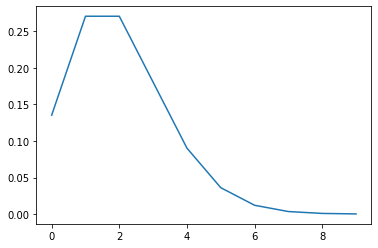

In [149]:
plt.plot(poisson.pmf(range(10), 2))

Text(0.5, 0, 'number of cells per well')

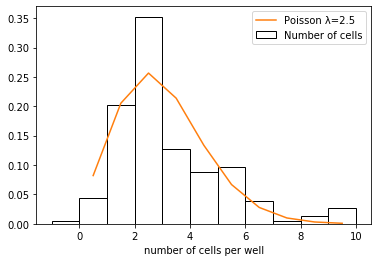

In [53]:
plt.hist(feb_data.n_cells, bins=11, density=True, fill=None, label='Number of cells')
plt.plot(np.arange(10)+.5, poisson.pmf(np.arange(10), 2.5), label='Poisson λ=2.5')
plt.legend()
plt.xlabel('number of cells per well')

In [171]:
plt.hist(mar_data.n_cells / 3, density=True, bins=range(10))
plt.plot(np.arange(10) + 0.5, poisson.pmf(range(10), 1))